#    Weather Data

    It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. We provide you with the dataset from NOAA of the weather conditions of 2007 to 2014, during the months of the tests. 

    Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
    Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

#    Map Data

    The map files mapdata_copyright_openstreetmap_contributors.rds and mapdata_copyright_openstreetmap_contributors.txt are from Open Streetmap and are primarily provided for use in visualizations (but you are allowed to use them in your models if you wish).

    Here's an example using mapdata_copyright_openstreetmap_contributors.rds, and here's one using mapdata_copyright_openstreetmap_contributors.txt.

    
    spray.csv - GIS data of spraying efforts in 2011 and 2013
    Date, Time: the date and time of the spray
    Latitude, Longitude: the Latitude and Longitude of the spray
    weather.csv - weather data from 2007 to 2014. Column descriptions in noaa_weather_qclcd_documentation.pdf.

In [1]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns=None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("weather.csv",na_values="M",index_col=["Date"],parse_dates=["Date"])
df.head()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67.0,14.0,51,56.0,0.0,2.0,0448,1849,,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68.0,NaN,51,57.0,0.0,3.0,-,-,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51.0,-3.0,42,47.0,14.0,0.0,0447,1850,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52.0,NaN,42,47.0,13.0,0.0,-,-,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56.0,2.0,40,48.0,9.0,0.0,0446,1851,,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [3]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.month for d in df.index]

# EDA

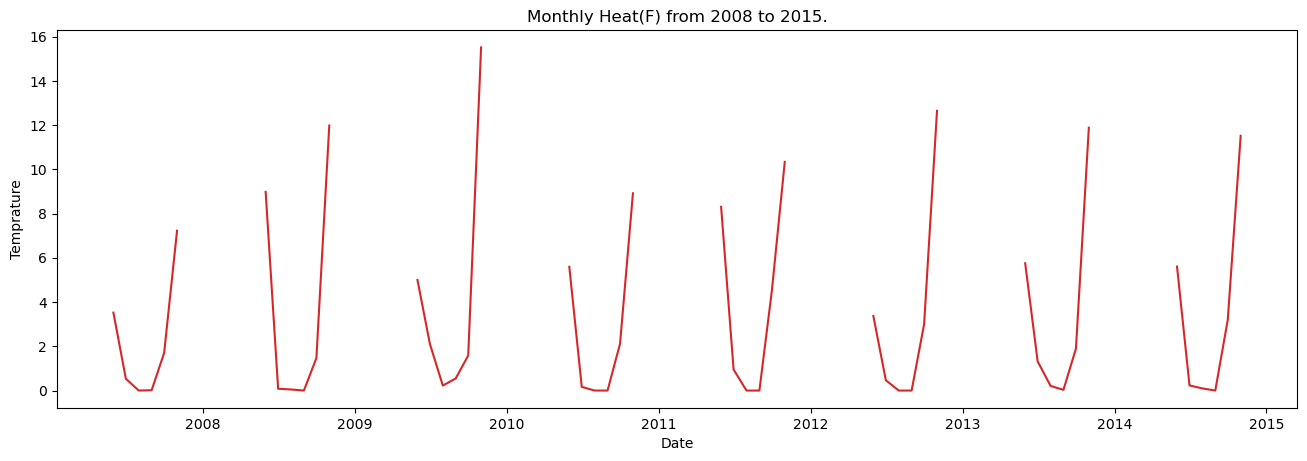

In [27]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Temprature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
df_m=df.resample("M")[["Heat"]].mean()
plot_df(df_m, x=df_m.index, y=df_m.Heat,
        title='Monthly Heat(F) from 2008 to 2015.')   

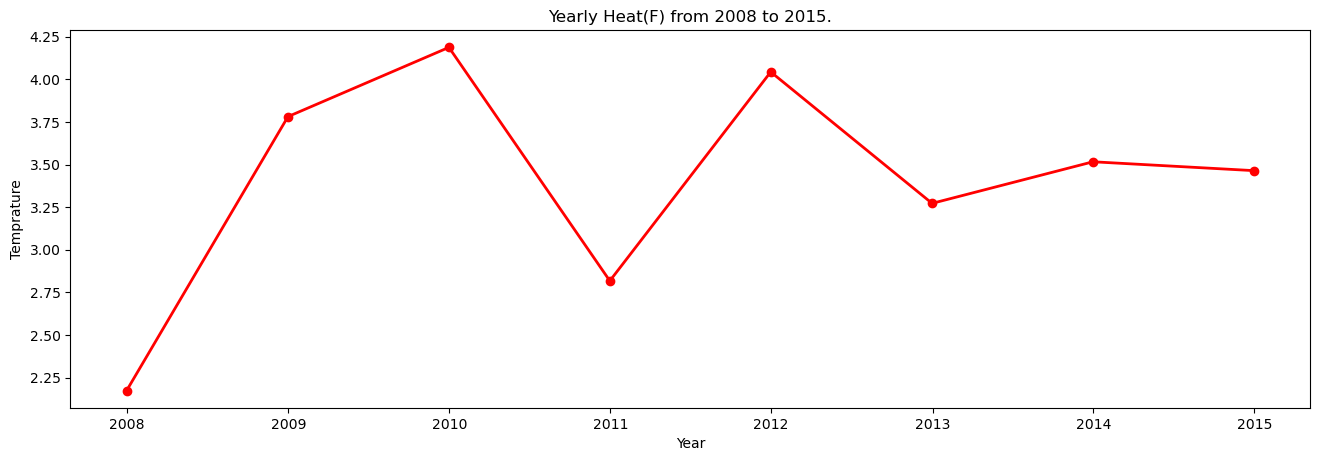

In [22]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Temprature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, df_m.Heat,color='red', linewidth=2 ,marker='o')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
df_m=df.resample("Y")[["Heat","Cool"]].mean()
plot_df(df_m, x=df_m.index, y=df_m[["Heat","Cool"]],
        title='Yearly Heat(F) from 2008 to 2015.')   

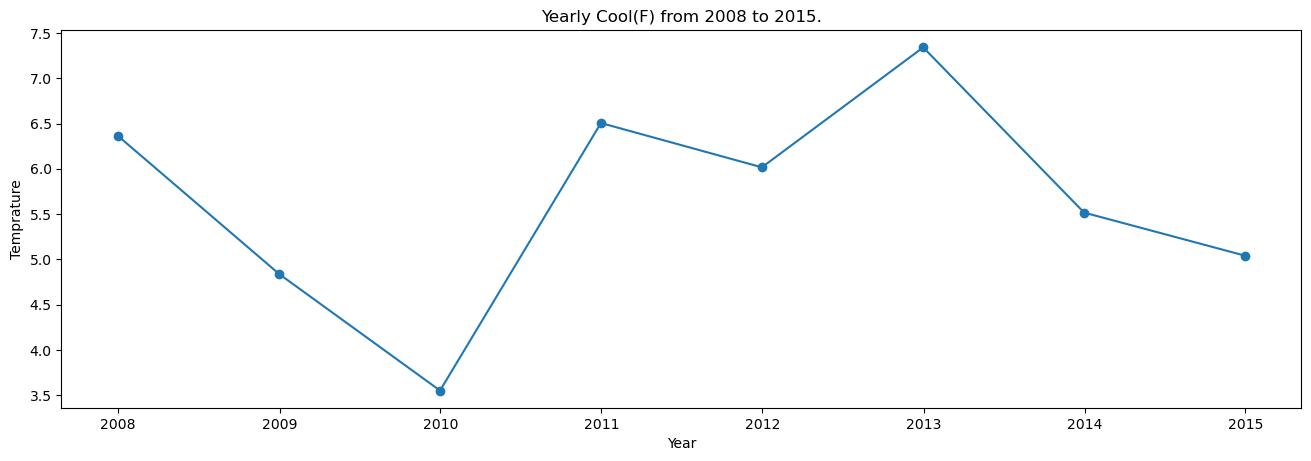

In [25]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Temprature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, df_m.Cool,marker='o')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
df_m=df.resample("Y")[["Heat","Cool"]].mean()
plot_df(df_m, x=df_m.index, y=df_m[["Heat","Cool"]],
        title='Yearly Cool(F) from 2008 to 2015.')   

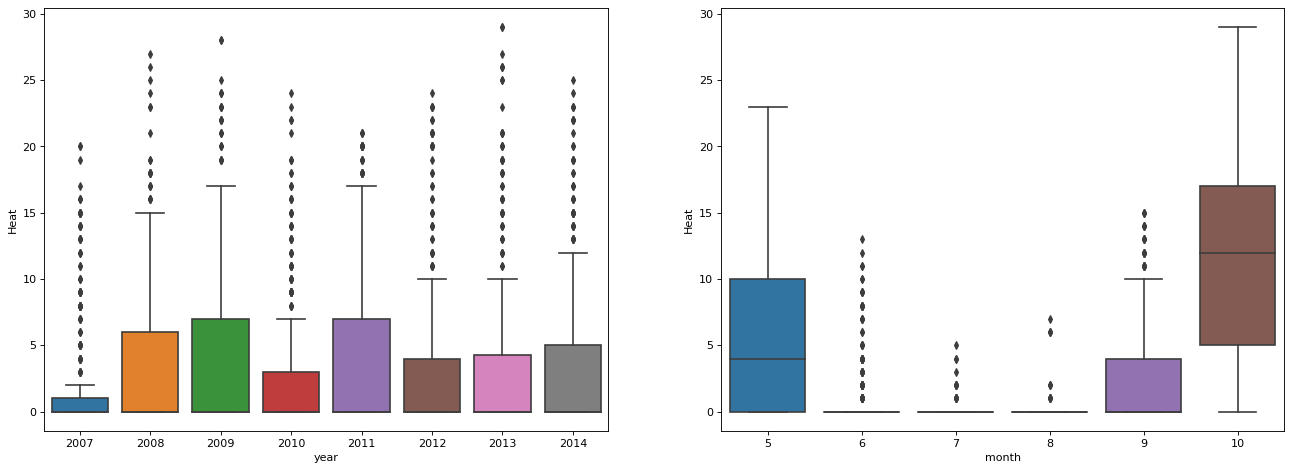

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Heat', data=df, ax=axes[0])
sns.boxplot(x='month', y='Heat', data=df,ax=axes[1])

# Wind Effect
    As compare to month 5 and 10 , months 6-9 has low AvgSpeed(wind) which is favorable for the growth of mosquitoes

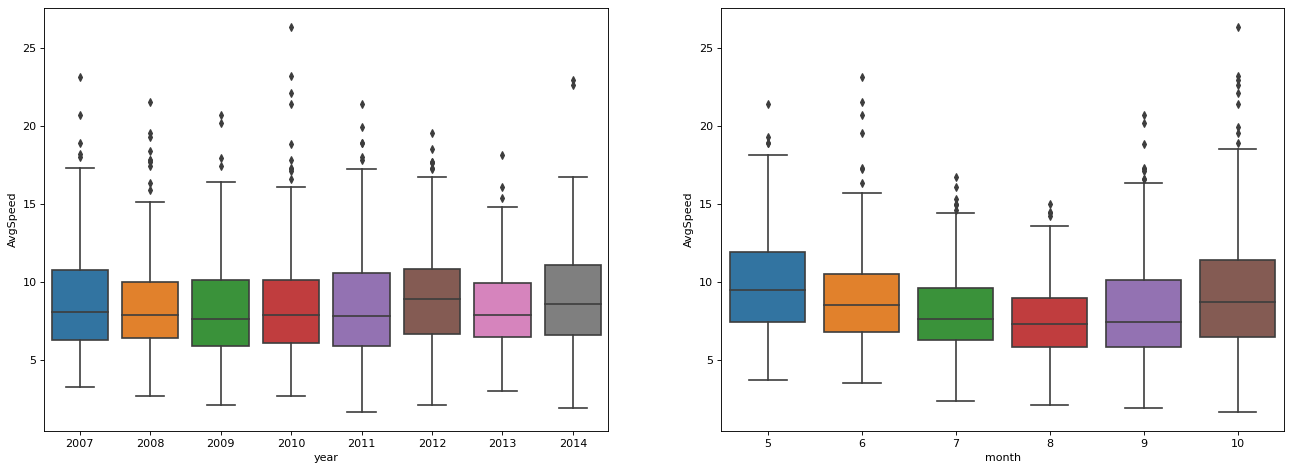

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='AvgSpeed', data=df, ax=axes[0])
sns.boxplot(x='month', y='AvgSpeed', data=df,ax=axes[1])

# ResultSpeed

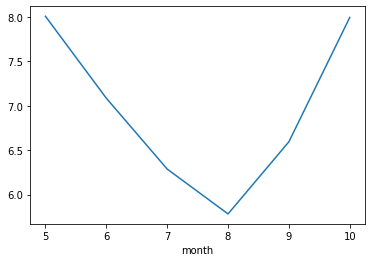

In [56]:
df.groupby(by="month")["ResultSpeed"].mean().plot()

# DewPoint 

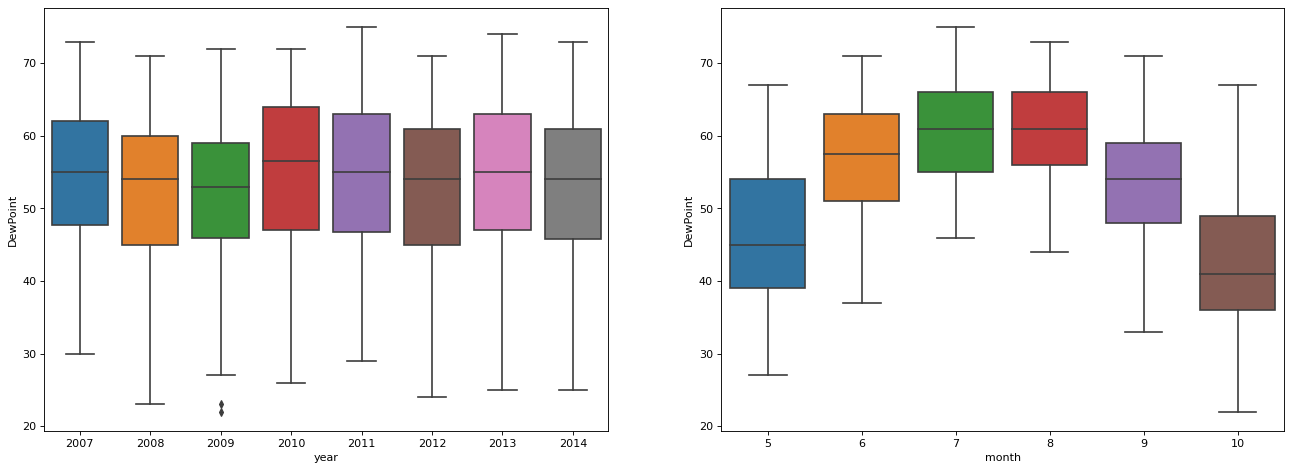

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='DewPoint', data=df, ax=axes[0])
sns.boxplot(x='month', y='DewPoint', data=df,ax=axes[1])